# Force balance calculations for ice-cored moraine dam

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def surface_velocity(h_i = 15, # ice thickness (m)
                     # h_d = 5, # debris thickness (m)
                     # porosity_d = 0.8, # debris porosity
                     slope = 10, # surface slope (degrees)
                     n = 3, # Glen's flow law exponent
                     A = 9.461999999999998e-17, # rheology constant for temperate glaciers (Pa^-3/yr), (3*10**-24)*(3.154e7)
                     g = 9.81, # acceleration due to gravity (m/s^2)
                     rho_i = 917, # density of ice (kg/m^3)
                     # rho_d = 2650
                    ): # density of debris cover (kg/m^3)
    # tau_b = (rho_i*g*h_i + rho_d*g*h_d*porosity_d) * np.sin(np.radians(slope)) # to consider debris
    tau_b = (rho_i*g*h_i) * np.sin(np.radians(slope)) # to consider ice only
    u_surf = (2*A/(n+1))*h_i*tau_b**n 
    return u_surf

In [12]:
# test a range of ice thicknesses:
h_i = np.linspace(0, 70)
slope = np.linspace(0, 20)
u_surf = surface_velocity(h_i=h_i, slope=slope)

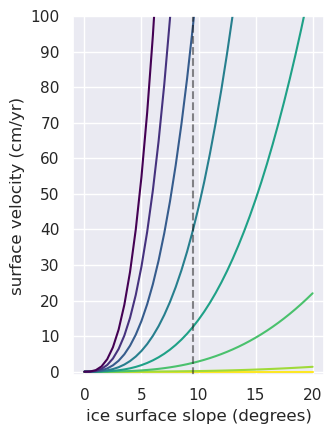

In [87]:
sns.set_theme()

# for multiple thicknesses: 
h_range = np.linspace(0, 70, 8)
slope_range = np.linspace(0, 20, 41)

f, ax = plt.subplots(figsize=(3.5, 4.5))
for h in h_range:
    u_surf = surface_velocity(h_i=h, slope=slope_range)
    color = plt.cm.viridis_r(h/h_range.max())
    ax.plot(slope_range, u_surf*100, c=color, label=f'{h:.0f}')

# mean observed velocity 
# ax.axhline(10)
# mean surface slope
ax.axvline(9.5, c='k', linestyle='dashed', alpha=0.5)

#ax.legend()
ax.set_ylabel('surface velocity (cm/yr)')
ax.set_xlabel('ice surface slope (degrees)')
#ax.set_yscale('log')
ax.set_ylim(-1, 80)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
f.tight_layout()
f.savefig(f'figs/ice_veloc.png', dpi=300)